<a href="https://colab.research.google.com/github/AnshDhingraAD/EVOLVAI/blob/main/PEC_MODEL_PART(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


0: 448x800 2 heads, 3 helmets, 821.0ms
Speed: 5.5ms preprocess, 821.0ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


Detected class: 1.0, Coordinates: (1087.461181640625, 0.0, 1198.9266357421875, 116.17298126220703), Score: 0.83
Detected class: 0.0, Coordinates: (250.9716339111328, 29.742782592773438, 315.4530944824219, 109.88622283935547), Score: 0.73
Detected class: 1.0, Coordinates: (559.6072998046875, 52.61311340332031, 605.01123046875, 103.85501861572266), Score: 0.61
Detected class: 1.0, Coordinates: (791.2635498046875, 34.469993591308594, 840.9873046875, 88.33531951904297), Score: 0.57
Detected class: 0.0, Coordinates: (471.99444580078125, 24.15648651123047, 558.0444946289062, 145.5758514404297), Score: 0.55
Biker box: (250.9716339111328, 29.742782592773438, 315.4530944824219, 109.88622283935547) vs Helmet box: (1087.461181640625, 0.0, 1198.9266357421875, 116.17298126220703)
Biker box: (250.9716339111328, 29.742782592773438, 315.4530944824219, 109.88622283935547) vs Helmet box: (559.6072998046875, 52.61311340332031, 605.01123046875, 103.85501861572266)
Biker box: (250.9716339111328, 29.7427825

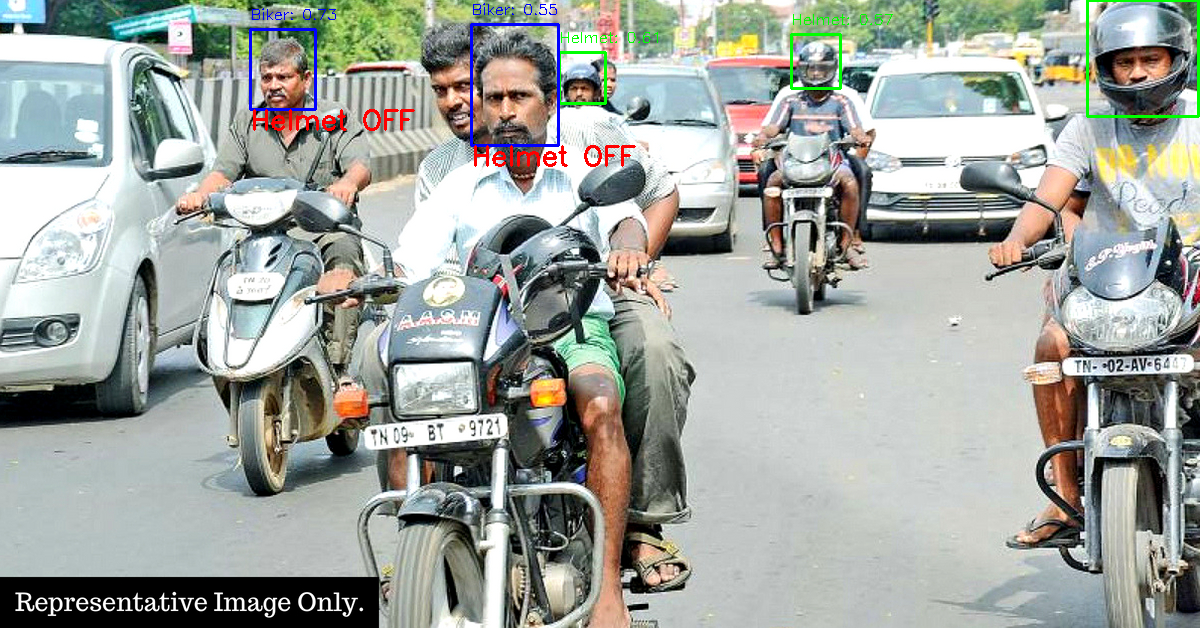

Number of 2-wheelers not wearing helmets: 2


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the pre-trained YOLO model
model = YOLO('/content/hemletYoloV8_25epochs.pt')  # Adjust path to your trained model

# Load the image
image_path = '/content/WhatsApp Image 2024-12-29 at 1.41.39 AM.jpeg'  # Replace with your image path
frame = cv2.imread(image_path)

# Define class IDs based on your YOLO model's labels
biker_class_id = 0  # Class ID for biker (2-wheeler)
helmet_class_id = 1  # Class ID for helmet

# Initialize counters
helmet_on_count = 0
helmet_off_count = 0

# Perform detection
results = model(frame, conf=0.5)

# Separate detections for bikers and helmets
biker_boxes = []
helmet_boxes = []

for detection in results[0].boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    print(f"Detected class: {class_id}, Coordinates: ({x1}, {y1}, {x2}, {y2}), Score: {score:.2f}")  # Debug print
    if int(class_id) == biker_class_id:
        biker_boxes.append((x1, y1, x2, y2, score))
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue box for bikers
        cv2.putText(frame, f"Biker: {score:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    elif int(class_id) == helmet_class_id:
        helmet_boxes.append((x1, y1, x2, y2, score))
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green box for helmets
        cv2.putText(frame, f"Helmet: {score:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Match helmets with bikers
for biker in biker_boxes:
    bx1, by1, bx2, by2, bscore = biker
    helmet_found = False

    for helmet in helmet_boxes:
        hx1, hy1, hx2, hy2, hscore = helmet

        # Debug: print the box coordinates of bikers and helmets being compared
        print(f"Biker box: ({bx1}, {by1}, {bx2}, {by2}) vs Helmet box: ({hx1}, {hy1}, {hx2}, {hy2})")

        # Check if helmet overlaps with biker (simple overlap test)
        if not (hx2 < bx1 or hx1 > bx2 or hy2 < by1 or hy1 > by2):  # Intersection
            helmet_found = True
            print(f"Helmet found for biker at ({bx1}, {by1}, {bx2}, {by2})")  # Debug print
            break

    if helmet_found:
        helmet_on_count += 1
        label = "Helmet ON"
        color = (0, 255, 0)  # Green for helmet detected
    else:
        helmet_off_count += 1
        label = "Helmet OFF"
        color = (0, 0, 255)  # Red for helmet not detected

    # Add label to biker box
    cv2.putText(frame, label, (int(bx1), int(by2) + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Display the results
cv2_imshow(frame)

# Print the statistics
print(f"Number of 2-wheelers not wearing helmets: {helmet_off_count}")

# Release resources
cv2.destroyAllWindows()


In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

# Load pre-trained YOLO model (YOLOv5 small model)
model = torch.hub.load('/content/ultralytics-yolov5-v7.0-374-g94a6245 (1) (1).zip', 'custom', path='custom_weights.pt')

# Load image
image_path = 'vehicle.jpg'  # Replace with your image path
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform detection
results = model(image)

# Extract detection results
detections = results.xyxy[0]  # Bounding boxes

for det in detections:
    x1, y1, x2, y2, conf, cls = map(int, det[:6])
    label = model.names[int(det[5])]  # Class name

    # Filter for "license plates" (modify if using a custom-trained model)
    if conf > 0.5:  # Confidence threshold
        print(f"Detected {label} with confidence {conf:.2f}")

        # Crop the detected region
        cropped_plate = image[y1:y2, x1:x2]

        # Display cropped plate
        plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
        plt.title("Cropped License Plate")
        plt.show()

        # Save the cropped image (optional)
        cv2.imwrite('cropped_plate.jpg', cropped_plate)


In [ ]:
!pip install yolov5 torch torchvision matplotlib


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


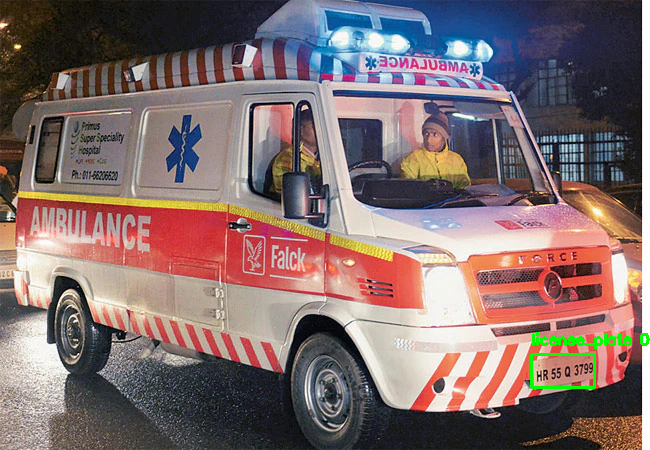

In [ ]:
import yolov5
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load YOLOv5 model
model = yolov5.load('keremberke/yolov5m-license-plate')

# Set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # Maximum number of detections per image

# Set the image path
img_path = '/content/red-650_012015085726.webp'  # Update with your local image path

# Perform inference
results = model(img_path, size=640)

# Load the original image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for consistency with YOLOv5

# Render detections directly on the image
for box in results.xyxy[0]:  # Loop through detections
    x1, y1, x2, y2, conf, cls = map(int, box[:6])
    label = f"{model.names[int(cls)]} {conf:.2f}"  # Class label and confidence
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save the rendered image
output_path = "detected_image.jpg"
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR for OpenCV
cv2.imwrite(output_path, image_bgr)

# Display the image in Colab
cv2_imshow(image_bgr)


In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,609 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 19.4 MB/s eta 0:00:00


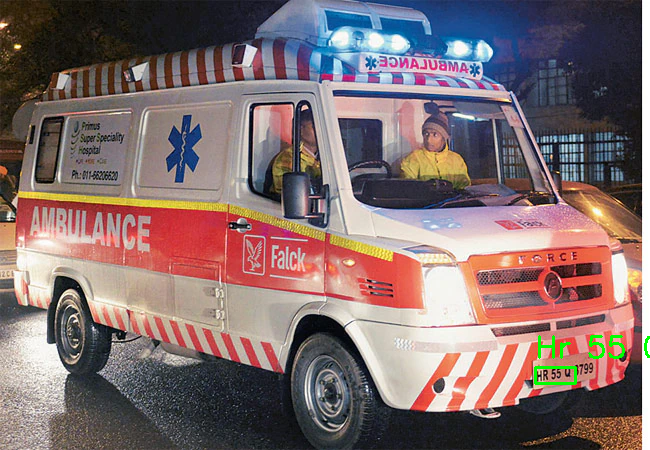

In [ ]:
import easyocr
import cv2
import numpy as np
import os

reader = easyocr.Reader(['en'])

img_path = '/content/red-650_012015085726.webp'  # Replace with your actual image path

if not os.path.exists(img_path):
    print(f"Error: Image not found at {img_path}")
else:
    image = cv2.imread(img_path)

    # Image Preprocessing
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)

    _, thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    results = reader.readtext(thresh)

    for (bbox, text, prob) in results:
        if prob > 0.5:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))

            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

            cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    from google.colab.patches import cv2_imshow
    cv2_imshow(image)

